In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Load data

Load in the data and handle multiple rows for the same day in speeches.csv the same way in the R solution:

In [46]:
import pandas as pd

# load in the data, note your paths to the data may be different from what are showing here
fx = pd.read_csv("fx.csv", skiprows=4, na_values=['-'])
fx.columns = ["date", "exchange_rate"]


speeches = pd.read_csv("speeches.csv", sep='|', usecols=['date', 'contents'])
speeches.dropna(inplace=True)


In [47]:
speeches.shape

(2492, 2)

In [48]:
fx['exchange_rate'].isna().sum()
fx[fx['exchange_rate'].isna()]

,date,exchange_rate
2442,2012-05-01,NaN
2458,2012-04-09,NaN
2459,2012-04-06,NaN
2533,2011-12-26,NaN
2708,2011-04-25,NaN
...,...,...
5403,2000-12-25,NaN
5573,2000-05-01,NaN
5578,2000-04-24,NaN
5579,2000-04-21,NaN


In [49]:
fx.shape

(5919, 2)

In [50]:
from collections import Counter
Counter(speeches.date)

Counter({'2021-10-20': 1,
         '2021-10-19': 2,
         '2021-10-16': 1,
         '2021-10-14': 1,
         '2021-10-12': 1,
         '2021-10-11': 1,
         '2021-10-08': 1,
         '2021-10-07': 1,
         '2021-10-05': 1,
         '2021-10-01': 1,
         '2021-09-30': 1,
         '2021-09-28': 1,
         '2021-09-27': 1,
         '2021-09-24': 1,
         '2021-09-23': 1,
         '2021-09-20': 1,
         '2021-09-15': 1,
         '2021-09-13': 1,
         '2021-08-24': 1,
         '2021-07-14': 1,
         '2021-07-11': 1,
         '2021-07-03': 1,
         '2021-06-29': 1,
         '2021-06-28': 2,
         '2021-06-21': 1,
         '2021-06-16': 1,
         '2021-06-15': 1,
         '2021-06-14': 1,
         '2021-06-03': 1,
         '2021-06-02': 1,
         '2021-05-27': 2,
         '2021-05-19': 1,
         '2021-05-06': 1,
         '2021-04-29': 1,
         '2021-04-26': 2,
         '2021-04-14': 2,
         '2021-04-08': 1,
         '2021-03-27': 1,
         '20

In [51]:
speeches.groupby("date")['contents'].apply(lambda x: " ".join(x.astype(str)))

date
1997-02-07      Conference organised by the Hungarian Bankin...
1997-03-10      Securing the benefits of EMU   Address by Al...
1997-04-22      Convergence and the role of the European Cen...
1997-04-30      The operation of monetary policy in stage th...
1997-05-13      The European Central Bank: independent and a...
                                    ...                        
2021-10-12       SPEECH  The contribution of finance to comb...
2021-10-14       SPEECH  IMFC Statement    Statement by Chri...
2021-10-16       SPEECH  Globalisation after the pandemic   ...
2021-10-19       SPEECH  “Hic sunt leones” – open research q...
2021-10-20       SPEECH  Overcoming the tragedy of the horiz...
Name: contents, Length: 1912, dtype: object

In [52]:
speeches = speeches.groupby("date")['contents'].apply(lambda x: " ".join(x.astype(str))).reset_index()
speeches.shape

(1912, 2)

In [53]:
pd.merge(fx, speeches, on ='date').isna().sum()

date             0
exchange_rate    1
contents         0
dtype: int64

In [54]:
df = pd.merge(fx, speeches, on ='date', how = 'left')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)

In [55]:
df

,exchange_rate,contents
date,,
2021-11-16,1.1368,NaN
2021-11-15,1.1444,NaN
2021-11-12,1.1448,NaN
2021-11-11,1.1460,NaN
2021-11-10,1.1558,NaN
...,...,...
1999-01-08,1.1659,NaN
1999-01-07,1.1632,NaN
1999-01-06,1.1743,NaN


## Remove entries with obvious outliers or mistakes

We first see if there is any obvious outliers or mistakes by plotting the data:

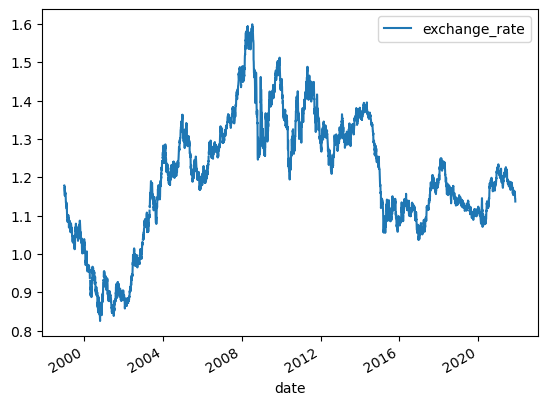

In [56]:
df.plot();

And look at the summary statistics:

In [8]:
df.describe()

,exchange_rate
count,5857.000000
mean,1.199326
std,0.159310
min,0.825200
25%,1.102500
50%,1.199000
75%,1.316900
max,1.599000


The data does not seem to have obvious outliers or mistakes. 

## 3.	Handle missing observations

We can see that there are some missing data:

In [57]:
df.isna().sum()

exchange_rate      62
contents         4168
dtype: int64

Here we fill in the exchange rate with the latest information available:

In [58]:
df.exchange_rate.fillna(method='bfill', inplace=True)

We can see there is no more missing data for exchange rate:

In [59]:
df.isna().sum()

exchange_rate       0
contents         4168
dtype: int64


## 4. Exchange rate return

Get the return by using the formula: $R_{t} = \frac{P_{t}-P_{t-1}}{P_{t-1}}$

In [81]:
df.exchange_rate

date
2021-11-16    1.1368
2021-11-15    1.1444
2021-11-12    1.1448
2021-11-11    1.1460
2021-11-10    1.1558
               ...  
1999-01-08    1.1659
1999-01-07    1.1632
1999-01-06    1.1743
1999-01-05    1.1790
1999-01-04    1.1789
Name: exchange_rate, Length: 5919, dtype: float64

In [80]:
df.exchange_rate.diff(-1)

date
2021-11-16   -0.0076
2021-11-15   -0.0004
2021-11-12   -0.0012
2021-11-11   -0.0098
2021-11-10   -0.0019
               ...  
1999-01-08    0.0027
1999-01-07   -0.0111
1999-01-06   -0.0047
1999-01-05    0.0001
1999-01-04       NaN
Name: exchange_rate, Length: 5919, dtype: float64

In [60]:
df['return'] = df.exchange_rate.diff(-1)/df.exchange_rate

In [64]:
(df['return'] > 0.5/100).astype(int)

date
2021-11-16    0
2021-11-15    0
2021-11-12    0
2021-11-11    0
2021-11-10    0
             ..
1999-01-08    0
1999-01-07    0
1999-01-06    0
1999-01-05    0
1999-01-04    0
Name: return, Length: 5919, dtype: int64

Extend the dataset with the variables "good_news" and "bad_news":

In [65]:
df['good_news'] = (df['return'] > 0.5/100).astype(int)
df['bad_news'] = (df['return'] < -0.5/100).astype(int)

In [66]:
df

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2021-11-16,1.1368,NaN,-0.006685,0,1
2021-11-15,1.1444,NaN,-0.000350,0,0
2021-11-12,1.1448,NaN,-0.001048,0,0
2021-11-11,1.1460,NaN,-0.008551,0,1
2021-11-10,1.1558,NaN,-0.001644,0,0
...,...,...,...,...,...
1999-01-08,1.1659,NaN,0.002316,0,0
1999-01-07,1.1632,NaN,-0.009543,0,1
1999-01-06,1.1743,NaN,-0.004002,0,0


In [18]:
df.describe()

,exchange_rate,return,good_news,bad_news
count,5919.000000,5918.000000,5919.000000,5919.000000
mean,1.199317,-0.000024,0.166413,0.168272
std,0.159958,0.005961,0.372483,0.374139
min,0.825200,-0.048494,0.000000,0.000000
25%,1.102000,-0.003260,0.000000,0.000000
50%,1.199700,0.000000,0.000000,0.000000
75%,1.317500,0.003244,0.000000,0.000000
max,1.599000,0.041170,1.000000,1.000000


## 5. Associate words with `good_news`, `bad_news`

Get the contents that associate with `good_news` and `bad_news`:

In [67]:
# remove rows with NA 
df.dropna(inplace=True)
df.head()

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2021-10-20,1.1623,SPEECH Overcoming the tragedy of the horiz...,-0.002753,0,0
2021-10-19,1.1655,SPEECH “Hic sunt leones” – open research q...,0.004376,0,0
2021-10-14,1.1602,SPEECH IMFC Statement Statement by Chri...,0.003448,0,0
2021-10-12,1.1555,SPEECH The contribution of finance to comb...,-0.001644,0,0
2021-10-11,1.1574,SPEECH The monetary policy toolbox and the...,0.000432,0,0


In [76]:
# get the contents related to "good_news" and "bad_news"
good_news_contents = df.contents[df.good_news==1].str.cat(sep=' ')
bad_news_contents = df.contents[df.bad_news==1].str.cat(sep=' ')

Load in some stop words, which are words that used to form a sentence but does not add much meaning to a sentence. Example of stop words are "a", "the" "does", "i", etc. 

In [77]:
stop_words = set(pd.read_csv("stopwords.txt", header=None).iloc[:,0].tolist())

In [78]:
len(stop_words)

423

The function below helps us to get the most common words (excluding stop_words) related to `good_news` and `bad_news`. Please read the comments to understand how it works:

In [95]:
import string
import collections

def get_word_freq(contents, stop_words, num_words):
    freq = dict()
    
    
    for word in contents.split():
        word = word.strip(string.punctuation+'–')
        word = word.lower()
        if word not in stop_words and len(word):
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1
                
                
    freq = dict(sorted(freq.items(), key = lambda item: -item[1]))
    return list(freq.keys())[:num_words]


Use the function above to get the 20 most common words associated with `good_news` and `bad_news`

In [96]:
good_indicators = get_word_freq(good_news_contents, stop_words, num_words = 20)
bad_indicators = get_word_freq(bad_news_contents, stop_words, num_words = 20)

In [97]:
good_indicators

['euro',
 'financial',
 'policy',
 'monetary',
 'de',
 'economic',
 'market',
 'central',
 'stability',
 'ecb',
 'banks',
 'inflation',
 'european',
 'der',
 'die',
 'price',
 'growth',
 'countries',
 'la',
 'markets']

In [98]:
bad_indicators

['euro',
 'financial',
 'policy',
 'monetary',
 'market',
 'de',
 'central',
 'economic',
 'banks',
 'stability',
 'european',
 'ecb',
 'growth',
 'price',
 'inflation',
 'la',
 'bank',
 'markets',
 'countries',
 'risk']

Note that many terms appear in both, and the results are not the same as R. It may because the `word_tokenizer()` in R may not work the same way as `split()` with `strip()`.